In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/spam-email/spam.csv')

In [4]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [6]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data = data.rename(columns={"Category":"Output","Message":"Input"})

In [8]:
data.shape

(5572, 2)

In [9]:
print(data.columns)

Index(['Output', 'Input'], dtype='object')


In [10]:
data['Output'].value_counts()

Output
0    4825
1     747
Name: count, dtype: int64

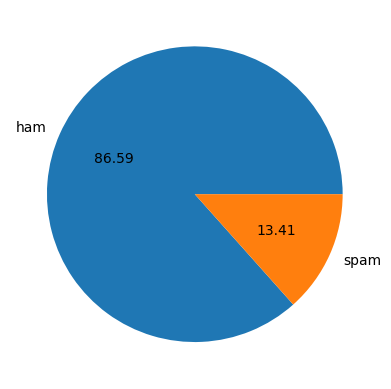

In [11]:
plt.pie(data['Output'].value_counts(),autopct= "%.2f", labels=['ham','spam'])
plt.show()

Feature engineering

In [12]:
import nltk

In [13]:
# Total No. of Characters in Data
data['characters'] = data['Input'].apply(len)

In [14]:
# Total No. of Words in Data
data["word"] = data["Input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [15]:
# Total No. of Sentences in Data
data['sentence'] = data['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
data.head()

,Output,Input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# statistical analysis of the new features
data[['characters','word','sentence']].describe()

,characters,word,sentence
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.629756,1.999641
std,59.926946,13.749739,1.520989
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,219.000000,38.000000


In [18]:
# statistical analysis of Ham data
data[data['Output']==0][['characters','word','sentence']].describe()

,characters,word,sentence
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.226528,1.840415
std,58.434864,14.006864,1.452475
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [19]:
# statistical aalysis of spam data
data[data['Output']==1][['characters','word','sentence']].describe()

,characters,word,sentence
count,747.000000,747.000000,747.000000
mean,137.989290,27.693440,3.028112
std,29.980287,6.939879,1.552655
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


Histogram

In [20]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

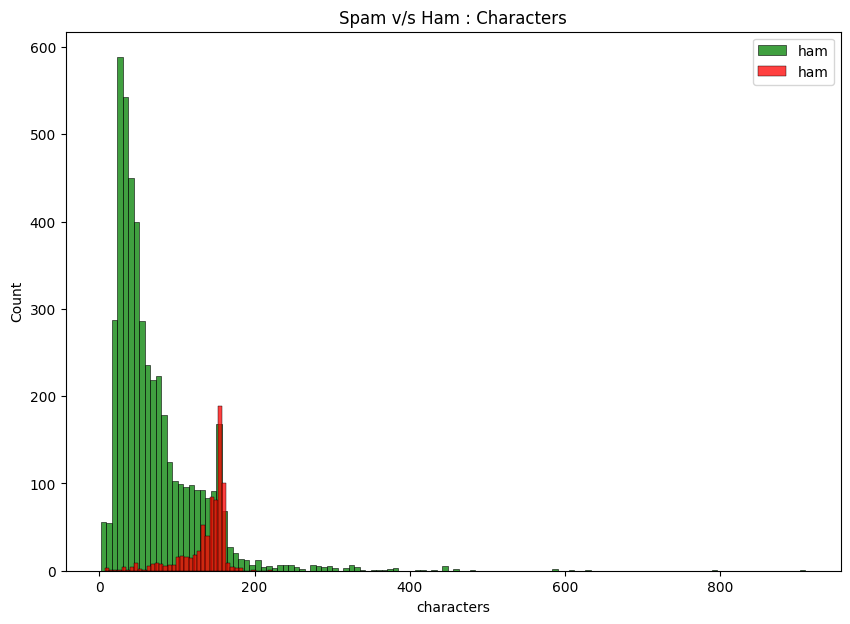

In [21]:

plt.figure(figsize=(10,7))
sns.histplot(data[data['Output']==0]['characters'],label = 'ham',color='green')
sns.histplot(data[data['Output']==1]['characters'],label = 'ham',color='red')
plt.title('Spam v/s Ham : Characters')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

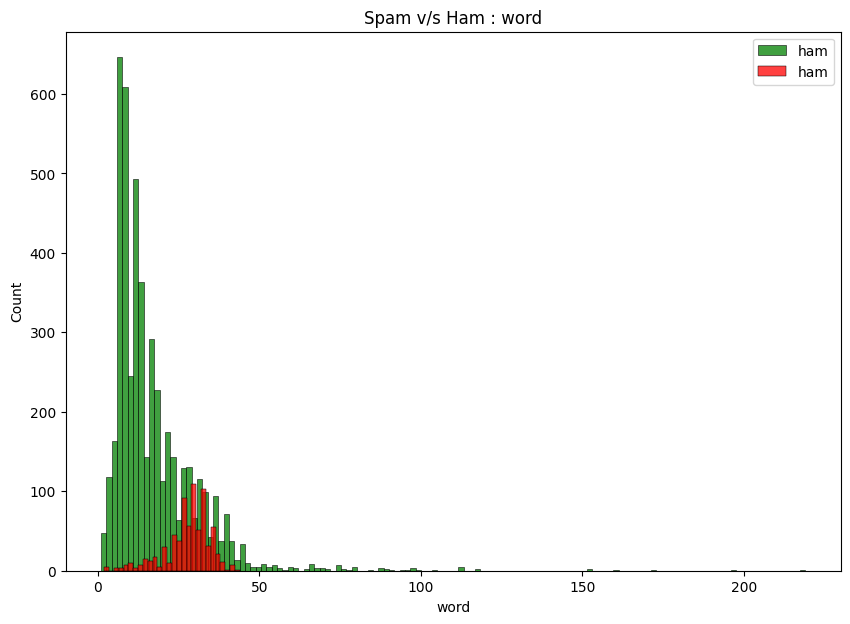

In [22]:

plt.figure(figsize=(10,7))
sns.histplot(data[data['Output']==0]['word'],label = 'ham',color='green')
sns.histplot(data[data['Output']==1]['word'],label = 'ham',color='red')
plt.title('Spam v/s Ham : word')
plt.legend()
plt.show()

* Ham characters and words are more than spam 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

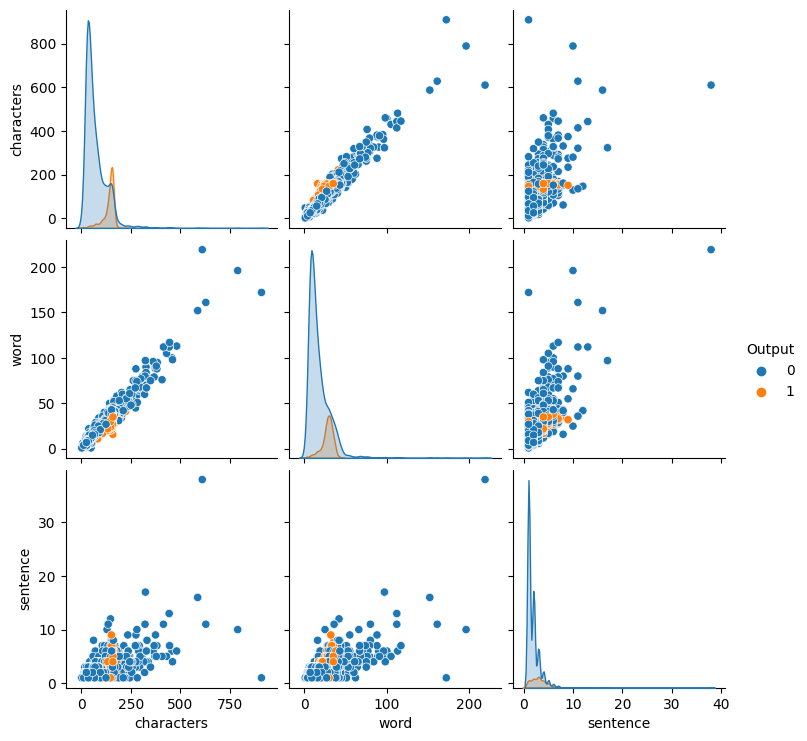

In [23]:
sns.pairplot(data, hue='Output')

* Outliers are present

In [24]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download 'wordnet' resource
import nltk
nltk.download('wordnet')

# Function for text preprocessing
def preprocess_text(text):
    # Tokenization and preprocessing steps
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = PorterStemmer()
    tokens = [lemmatizer.stem(word) for word in tokens]
    print(tokens)
    return ' '.join(tokens)

# Checking the function with sample text
preprocess_text("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")



[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['shree', 'ram', 'shree', 'mahakaleshawar', 'everyth']


'shree ram shree mahakaleshawar everyth'

In [26]:
data['New data'] = data['Input'].apply(preprocess_text)


['go', 'jurong', 'point', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'may', 'text', 'fa', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli']
['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say']
['nah', 'think', 'goe', 'usf', 'live', 'around', 'though']
['freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'valid', 'hour']
['mobil', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free

In [27]:
data.head()

,Output,Input,characters,word,sentence,New data
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Word Cloud

In [28]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [29]:
# Wordcloud for SPAM
spam_wc = wc.generate(data[data["Output"] ==1]["New data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(data[data["Output"] ==0]["New data"].str.cat(sep=" "))

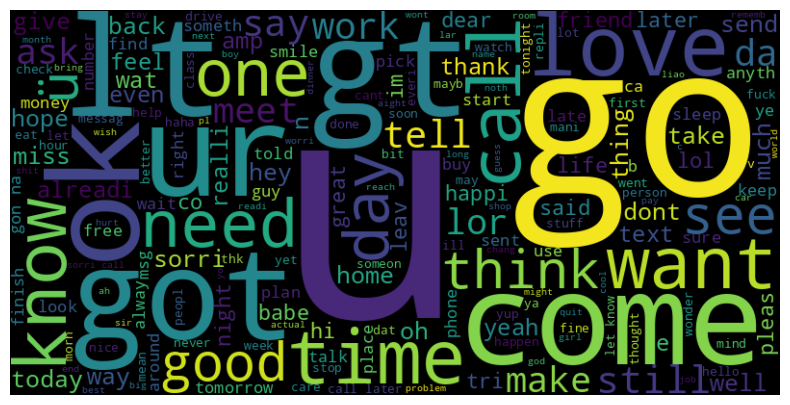

In [30]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

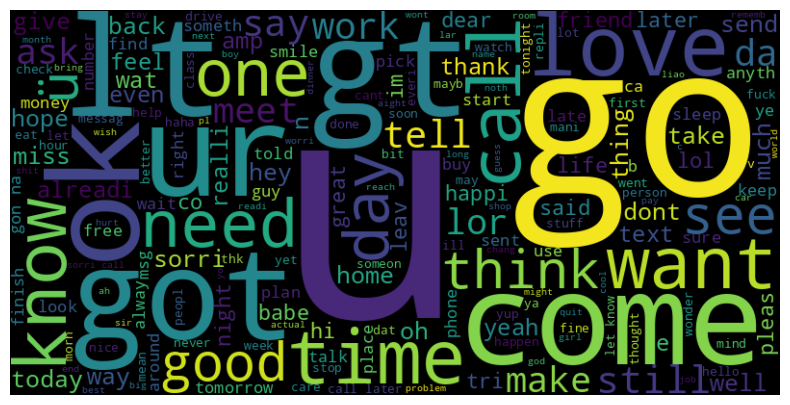

In [31]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Bar Plot

In [32]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in data[data["Output"]==1]["New data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


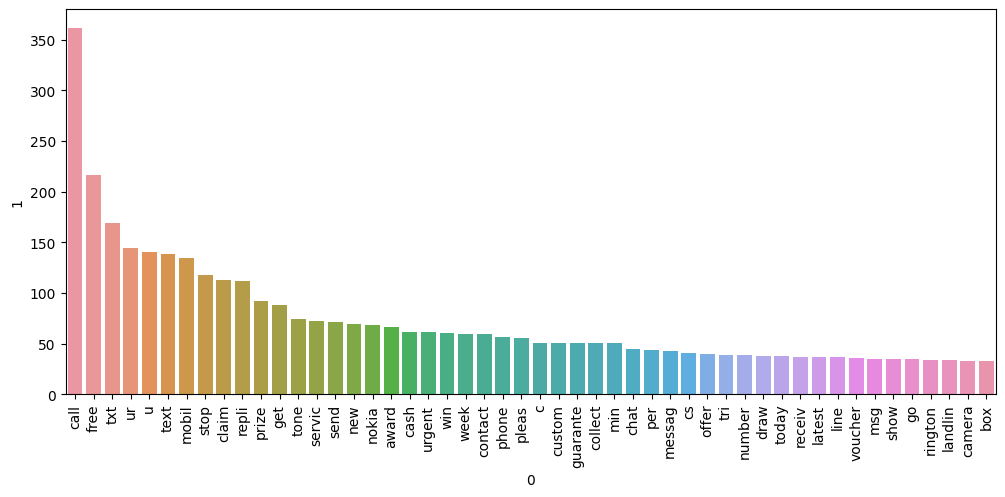

In [33]:
from collections import  Counter

# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [34]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in data[data['Output'] == 0]['New data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


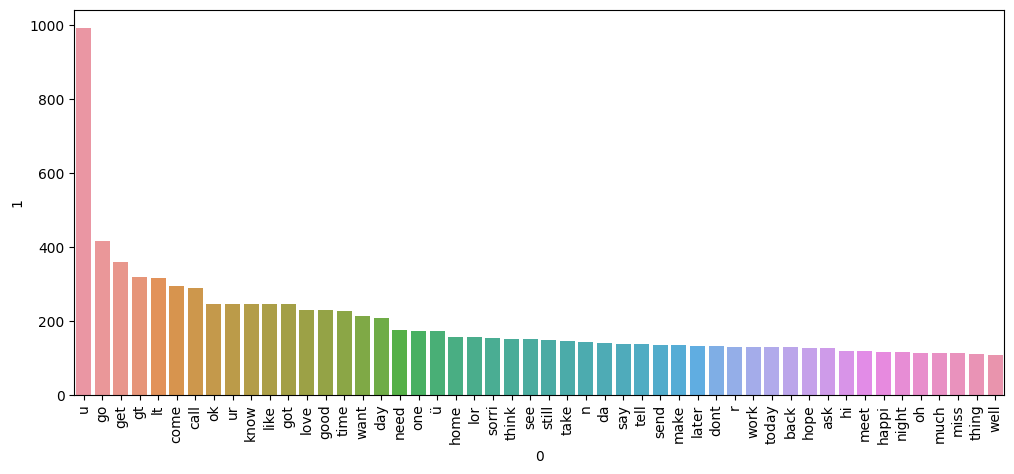

In [35]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [37]:
tfidv = TfidfVectorizer(max_features=5000,  # You can adjust max_features as needed
            tokenizer=word_tokenize,
            stop_words=stopwords.words('english'),
            lowercase=True)

In [38]:
# Independent Feature
X = tfidv.fit_transform(data["New data"]).toarray()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [39]:
# Dependent Feature
y = data["Output"].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [43]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [44]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [45]:
# A FOR loop Calls "train_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [46]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

📈 Algorithms: Accuracy and Precision 🎯

In [47]:
scores_df


,Algorithm,Accuracy,Precision
1,Multinomial NB,0.956951,1.000000
4,SVC,0.971300,1.000000
6,KNN,0.907623,1.000000
8,Random Forest,0.972197,1.000000
12,XGB,0.970404,0.984496
9,ETC,0.969507,0.984375
3,Logistic Regression,0.949776,0.963636
11,Gradient Boost,0.955157,0.957627
2,Bernoulli NB,0.962332,0.953125
10,Ada Boost,0.956951,0.892857


📊 Scores Bar Plot 📊

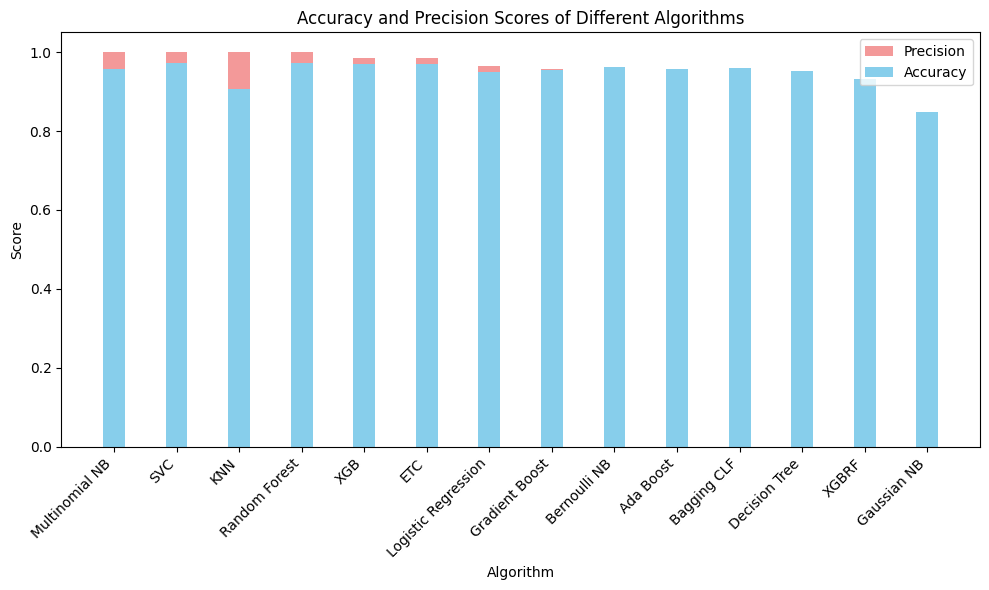

In [48]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

📌 Pickle Files 📌

In [50]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [51]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb"))